# Identification of patterns that determine the success of a computer game

## Project description <a id="start"></a>

### Purpose of the study

We were given the task of identifying the patterns that determine the success of the game in order to bet on a potentially popular product and plan an advertising campaign for 2017.

Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from open sources. Data presented up to 2016.

### Research order

At the beginning of the study, we will preprocess the data:

* cast the data to the required types
* handle missing values
* get rid of duplicates

We will choose an actual period for building a forecast for 2017 and then we will work only with data for this period.

We will examine the impact of critic ratings and user ratings on game sales.

For the current period, we will further study the most popular platforms. Separately, by region (North America, Europe and Japan), we will select the top 5:
* platforms
* genres
* game ratings

At the end of the study, we will give recommendations on the development of games for the most popular platforms, genres and ratings for the markets of North America, Europe and Japan.

## Data preparation <a id="preprocessing"></a>

### Opening data and casting to the desired types

In [161]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [162]:
try:
    games = pd.read_csv('C:/Users/annar/Yandex_Practicum/Sbornyi_proect_1/Games csv.csv')# local path
except:
#     games = pd.read_csv('/datasets/Games csv.csv')  # server path
    games = pd.read_csv('/datasets/games.csv') 

In [163]:
#Function to explore data
def data_info(data):
    return data.head(), data.info(), data.describe(), data.duplicated().sum(),data.isna().mean().apply('{:.0%}'.format)

In [164]:
data_info(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(                       Name Platform  Year_of_Release         Genre  NA_sales  \
 0                Wii Sports      Wii         2,006.00        Sports     41.36   
 1         Super Mario Bros.      NES         1,985.00      Platform     29.08   
 2            Mario Kart Wii      Wii         2,008.00        Racing     15.68   
 3         Wii Sports Resort      Wii         2,009.00        Sports     15.61   
 4  Pokemon Red/Pokemon Blue       GB         1,996.00  Role-Playing     11.27   
 
    EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
 0     28.96      3.77         8.45         76.00          8      E  
 1      3.58      6.81         0.77           NaN        NaN    NaN  
 2     12.76      3.79         3.29         82.00        8.3      E  
 3     10.93      3.28         2.95         80.00          8      E  
 4      8.89     10.22         1.00           NaN        NaN    NaN  ,
 None,
        Year_of_Release  NA_sales  EU_sales  JP_sales  Other_sales  \
 count  

Переименуем столбцы для удобства работы с таблицей

In [165]:
# Rename columns
games=games.rename(columns={colname:colname.lower() for colname in games.axes[1]})

In [166]:
# Check that all columns have been renamed
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Let's change the data type of the `year_of_release` column to integer. This column also contains missing values. Let's process them first.

In [167]:
# Look for rows with missing values in the 'year_of_release' column
games.loc[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [168]:
# Names of games missing a value in the 'year_of_release' column
games.loc[games['year_of_release'].isna()]['name'].value_counts()

LEGO Harry Potter: Years 5-7    7
Happy Feet Two                  4
Rock Band                       4
Test Drive Unlimited 2          3
Bejeweled 3                     3
                               ..
Jet X20                         1
Tony Hawk's Downhill Jam        1
Tribes: Aerial Assault          1
Big Beach Sports 2              1
Hakuouki: Shinsengumi Kitan     1
Name: name, Length: 232, dtype: int64

In [169]:
# Percentage of missing values in the 'year_of_release' column
len(games.loc[games['year_of_release'].isna()])/len(games)*100

1.609332934489979

The `year_of_release` column is missing 1.6% of the values. It is not possible to replace them in a reasonable time (search on the Internet for each game of the year of release). Therefore, we decide to get rid of rows with a missing value in the `year_of_release` column.

In [170]:
# Get rid of rows with NaN in 'year_of_release'
games=games.dropna(subset=['year_of_release'])

Change the data type of the `year_of_release` column to integer.

In [171]:
# Change data type to integer
games['year_of_release']=games['year_of_release'].astype(int)

In [172]:
# Check if the data type has changed
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


###  Handling Missing Values

The table has missing values in the `name`, `genre`, `year_of_release`, `critic_score`, `user_score` and `raiting` columns. In `year_of_release` we removed rows with missing values. Let's handle the missing values in the `name`, `genre`, `critic_score`, `user_score` and `raiting` columns.

In [173]:
data_info(games)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


(                       name platform  year_of_release         genre  na_sales  \
 0                Wii Sports      Wii             2006        Sports     41.36   
 1         Super Mario Bros.      NES             1985      Platform     29.08   
 2            Mario Kart Wii      Wii             2008        Racing     15.68   
 3         Wii Sports Resort      Wii             2009        Sports     15.61   
 4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   
 
    eu_sales  jp_sales  other_sales  critic_score user_score rating  
 0     28.96      3.77         8.45         76.00          8      E  
 1      3.58      6.81         0.77           NaN        NaN    NaN  
 2     12.76      3.79         3.29         82.00        8.3      E  
 3     10.93      3.28         2.95         80.00          8      E  
 4      8.89     10.22         1.00           NaN        NaN    NaN  ,
 None,
        year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
 count  

#### Handling missing values in 'critic_score' column

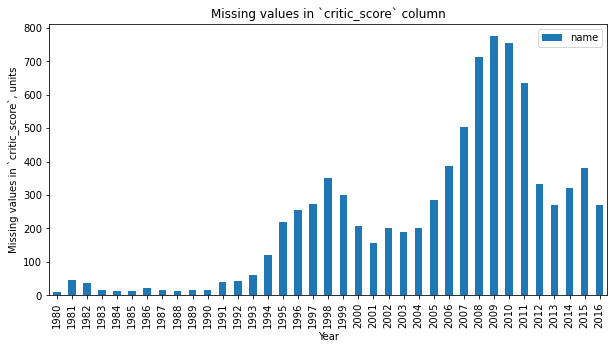

In [174]:
(games
 .loc[games['critic_score'].isna()]
 .pivot_table(index='year_of_release',values='name', aggfunc='count')
 .plot(
     kind='bar', y='name', xlabel='Year', ylabel='Missing values in `critic_score`, units',
     title = 'Missing values in `critic_score` column', figsize = (10,5))
)
plt.show()

In [175]:
# Unique values of the 'critic_score' column
games['critic_score']. unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Perhaps the missing values in the `critic_score` column appeared when the data was unloaded. Let's leave them unchanged for now.

#### Handling missing values in 'user_score' column

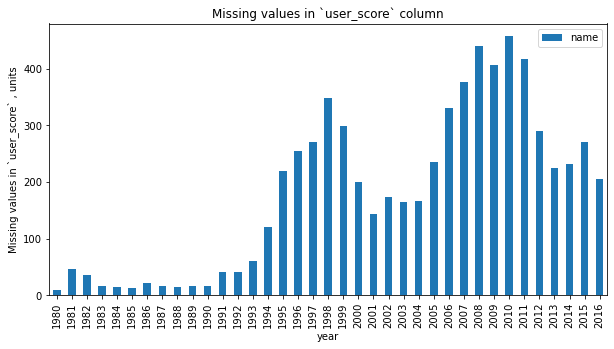

In [176]:
# Rows with NaN in 'user_score', yearly distribution
(games
 .loc[games['user_score'].isna()]
 .pivot_table(index='year_of_release',values='name', aggfunc='count')
 .plot(kind='bar', y='name', xlabel='year', 
       ylabel='Missing values in `user_score` , units', title = 'Missing values in `user_score` column', figsize = (10,5))
)
plt.show()

In [177]:
# Unique values of the 'user_score' column
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Let's assume that the `tbd` (To Be Determined) values of the `user_score` column are also missing values.

In [178]:
# Percentage of rows with value 'tbd' in `user_score` column
len(games.query('user_score=="tbd"'))/len(games)*100

14.447282013863552

Then we can use the to_numeric method to convert the user_score data type from object to float. Instead of tbd , the to_numeric method with errors='coerce' will return NaN.

In [179]:
# Data type conversion in `user_score` column
games['user_score']=pd.to_numeric(games['user_score'],errors='coerce')

In [180]:
# Checking
games['user_score'].head()

0   8.00
1    NaN
2   8.30
3   8.00
4    NaN
Name: user_score, dtype: float64

A possible missing value in the user_score column appeared when the data was uploaded. Let's leave them unchanged for now.

#### Handling missing values in the 'rating' column

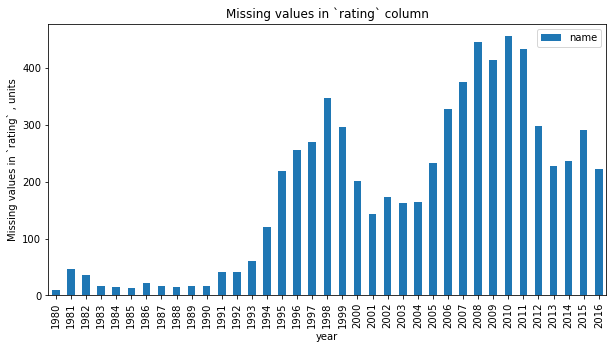

In [181]:
# Rows with NaN in 'rating', yearly distribution
(games
 .loc[games['rating'].isna()]
 .pivot_table(index='year_of_release',values='name', aggfunc='count')
 .plot(kind='bar', y='name', xlabel='year', 
       ylabel='Missing values in `rating` , units', title = 'Missing values in `rating` column', figsize = (10,5))
)
plt.show()

In [182]:
# Unique values of the 'rating' column
games['rating']. value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In the `rating` column, we will replace the missing values with the string "Unknown", assuming that there is no rating information for these games.

In [183]:
# Replacing NaN in 'rating' column with 'Unknown'
games.loc[games['rating'].isna(),'rating']='Unknown'

In [184]:
# Checking
games['rating']. unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

#### Handling missing values in 'rating' and 'genre' columns

For the `name` and `genre` columns, we will delete rows with missing values in `name` and `genre` at the same time, because they do not carry important information about the game name and genre.

In [185]:
# Rows with NaN in 'name' and 'genre'
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,Unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,Unknown


In [186]:
# Removing rows with NaN in 'name' and 'genre'
games=games.dropna(subset=['name'])

In [187]:
# Check if the rows are deleted
len(games.loc[games['name'].isna()])

0

### Data Processing Conclusions

So, we have processed the data in the `games` table:

* converted to type `int` the data of the column `year_of_release`
* converted to type `float` the data of the `user_score` column
* removed from the table rows with missing values in the `year_of_release` column
* replaced the missing values in the `rating` column with the string value `Unknown`
* left missing values in the `user_score` and `critic_score` columns unchanged

In [188]:
# Final table
data_info(games)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


(                       name platform  year_of_release         genre  na_sales  \
 0                Wii Sports      Wii             2006        Sports     41.36   
 1         Super Mario Bros.      NES             1985      Platform     29.08   
 2            Mario Kart Wii      Wii             2008        Racing     15.68   
 3         Wii Sports Resort      Wii             2009        Sports     15.61   
 4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   
 
    eu_sales  jp_sales  other_sales  critic_score  user_score   rating  
 0     28.96      3.77         8.45         76.00        8.00        E  
 1      3.58      6.81         0.77           NaN         NaN  Unknown  
 2     12.76      3.79         3.29         82.00        8.30        E  
 3     10.93      3.28         2.95         80.00        8.00        E  
 4      8.89     10.22         1.00           NaN         NaN  Unknown  ,
 None,
        year_of_release  na_sales  eu_sales  jp_sales  other

### Duplicate Handling

In [189]:
games.duplicated().value_counts()

False    16444
dtype: int64

No duplicates were found in the table.

### Adding a column with total revenue by region

In [190]:
# Adding a column 'grand_total_sales' with total revenue by region
games['grand_total_sales']=games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [191]:
# Check if the column has been added
data_info(games)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16444 non-null  object 
 1   platform           16444 non-null  object 
 2   year_of_release    16444 non-null  int32  
 3   genre              16444 non-null  object 
 4   na_sales           16444 non-null  float64
 5   eu_sales           16444 non-null  float64
 6   jp_sales           16444 non-null  float64
 7   other_sales        16444 non-null  float64
 8   critic_score       7983 non-null   float64
 9   user_score         7463 non-null   float64
 10  rating             16444 non-null  object 
 11  grand_total_sales  16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


(                       name platform  year_of_release         genre  na_sales  \
 0                Wii Sports      Wii             2006        Sports     41.36   
 1         Super Mario Bros.      NES             1985      Platform     29.08   
 2            Mario Kart Wii      Wii             2008        Racing     15.68   
 3         Wii Sports Resort      Wii             2009        Sports     15.61   
 4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   
 
    eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
 0     28.96      3.77         8.45         76.00        8.00        E   
 1      3.58      6.81         0.77           NaN         NaN  Unknown   
 2     12.76      3.79         3.29         82.00        8.30        E   
 3     10.93      3.28         2.95         80.00        8.00        E   
 4      8.89     10.22         1.00           NaN         NaN  Unknown   
 
    grand_total_sales  
 0              82.54  
 1          

## Data analysis

### Counting the number of games released each year. Evaluation of the importance of individual periods

In [192]:
# Number of unique values in the 'year_of_release' column
len(games['year_of_release'].unique())

37

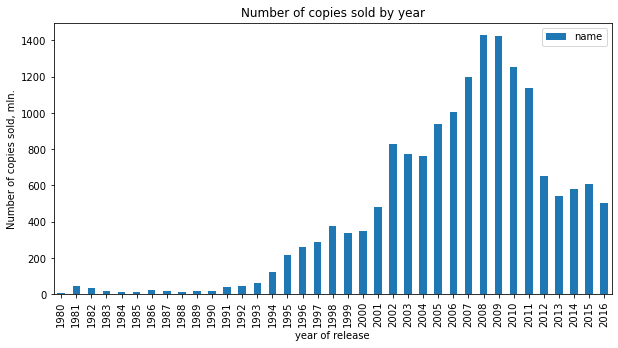

In [193]:
# Number of games released each year in descending order of release year
(games
 .pivot_table(index='year_of_release', values='name', aggfunc='count')
 .sort_values(axis=0, by='year_of_release')
 .plot(
     kind='bar', y='name', xlabel='year of release', ylabel='Number of copies sold, mln.',
     title = 'Number of copies sold by year', figsize=(10, 5))
)

plt.show()

In [194]:
# Median value for the number of games released per year
games.pivot_table(index='year_of_release', values='name', aggfunc='count')['name'].median()

338.0

In [195]:
# Mean value for the number of released games per year
games.pivot_table(index='year_of_release', values='name', aggfunc='count')['name'].mean()

444.43243243243245

As we can see, the number of released games has changed a lot over the years. Therefore, not all periods can be considered important. The largest number of games were released between 2001 and 2016.

### Distribution of sales by years for platforms with the highest total sales. Estimating the lifetime of the platform.

In [196]:
# Number of unique values in the "platform" column
len(games['platform'].unique())

31

Let's look at the platforms with the highest total sales.

In [197]:
# Pivot table on the total number of sales by platform
(games
 .pivot_table(index='platform',values='grand_total_sales',aggfunc='sum')
 .sort_values(by='grand_total_sales', ascending=False)
 .reset_index()
)

,platform,grand_total_sales
0,PS2,"1,233.56"
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Let's create a table with the distribution of sales by year, separately by platform.

In [198]:
# Total sales by platform for the current period by year
games_year_sales=(games
                  .pivot_table(index=['platform','year_of_release'],values='grand_total_sales',aggfunc='sum')
                  .reset_index()
                 )
games_year_sales

,platform,year_of_release,grand_total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


In [199]:
# Saving a column with the names of the 20 most profitable platforms in descending order of sales
top_20= (games
        .pivot_table(index='platform',values='grand_total_sales',aggfunc='sum')        
       ).nlargest(20, 'grand_total_sales').index.to_list()
# 
top_20

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'GB',
 'XB',
 'NES',
 'N64',
 'SNES',
 'GC',
 'XOne',
 '2600',
 'WiiU']

Let's build graphs of changes in sales by years for the 20 most profitable platforms.

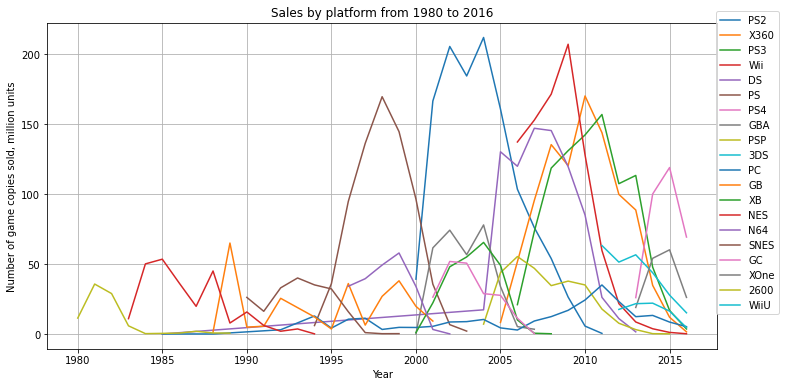

In [200]:
# Graphs of changes in sales by years for the 20 most profitable platforms
fig, ax = plt.subplots(figsize=(12, 6))

for name in top_20:
    ax.plot(games_year_sales.query('platform==@name')['year_of_release'], 
    games_year_sales.query('platform==@name')['grand_total_sales'],label=name)


ax.set_title(f'Sales by platform from 1980 to 2016')
ax.set_xlabel('Year')
ax.set_ylabel('Number of game copies sold, million units')
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.grid()
plt.show()

From the constructed graphs, we can conclude that the average life expectancy of the platform is approximately 10 years.

### Selecting a time period for building a forecast for 2017.

We will consider the period from 2014 to 2016 as the relevant period for making a forecast for 2017.

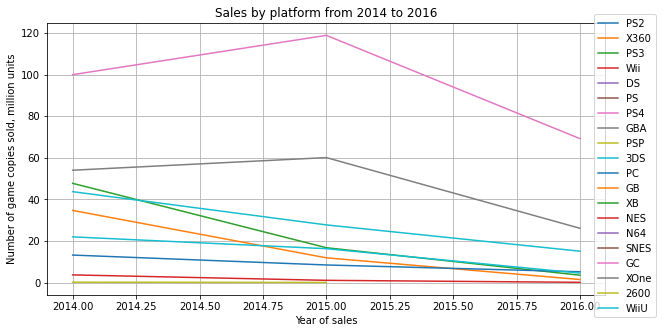

In [201]:
#Construction of graphs of changes in sales from 2014 to 2016
fig, ax = plt.subplots(figsize=(10, 5))

for name in top_20:
    ax.plot(games_year_sales.query('(platform==@name)&(year_of_release >=2014)')['year_of_release'], 
    games_year_sales.query('(platform==@name)&(year_of_release >=2014)')['grand_total_sales'],label=name)


ax.set_title(f'Sales by platform from 2014 to 2016')
ax.set_xlabel('Year of sales')
ax.set_ylabel('Number of game copies sold, million units')
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.grid()
plt.show()

### Deletion of data for previous years that are not related to the relevant period.

For further analysis, we leave only the data for the relevant period from 2014 to 2016.

In [202]:
# Creation of a new table where 'year_of_release' >= 2014
games_topical_period=games.query('year_of_release >= 2014')

In [203]:
# Checking that there are only years greater than 2014 inclusive
games_topical_period['year_of_release'].value_counts()

2015    606
2014    581
2016    502
Name: year_of_release, dtype: int64

Let's look at the platforms with the highest total sales in the relevant period.

In [204]:
# Total sales by platform for the relevant period
(games_topical_period
 .pivot_table(index='platform',values='grand_total_sales',aggfunc='sum')
 .sort_values(by='grand_total_sales', ascending=False)
 .reset_index()
)

,platform,grand_total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


Let's create a table with the distribution of sales by years, separately by platforms in the relevant period.

In [205]:
# Total sales by platform for the relevant period by year
games_topical_period_year_sales=(games_topical_period
                  .pivot_table(index=['platform','year_of_release'],values='grand_total_sales',aggfunc='sum')
                  .reset_index()
                 )
games_year_sales

,platform,year_of_release,grand_total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


### Choosing potentially profitable platforms

For further analysis, we leave only platforms in a given time period with the highest total sales. We will explore the top 5 most profitable platforms.

In [206]:
top_5= (games_topical_period
        .pivot_table(index='platform',values='grand_total_sales',aggfunc='sum')        
       ).nlargest(5, 'grand_total_sales').index.to_list()
# 
top_5

['PS4', 'XOne', '3DS', 'PS3', 'X360']

### Boxplots of global game sales by platform

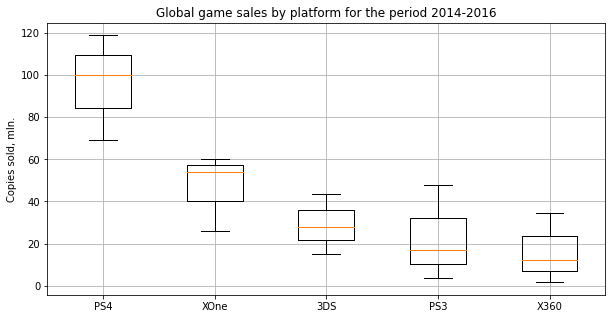

In [207]:
# Boxplots for potentially profitable platforms
fig = plt.figure(figsize =(10, 5))

data=[]
for name in top_5:
    data_platform=games_topical_period_year_sales.query('platform == @name')['grand_total_sales']
    data.append(data_platform)

ax = fig.add_subplot(111)
ax.boxplot(data)
ax.set_title('Global game sales by platform for the period 2014-2016')
ax.set_xticklabels(top_5)
ax.set_ylabel('Copies sold, mln.')

plt.grid()
plt.show()

According to the boxplots, it is visually clear how sales differ for different platforms:

* PS4 platform has the highest median number of game copies sold
* The smallest median value of sold copies of games for the X360 platform
* PS4 and PS3 platforms have the largest interquartile ranges

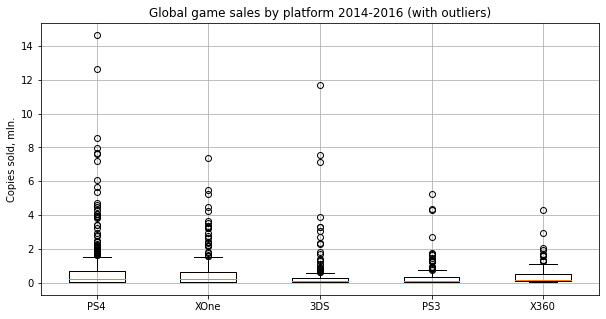

In [208]:
# Boxplots with outliers for potentially profitable platforms
fig = plt.figure(figsize =(10, 5))

data=[]
for name in top_5:
    data_platform=games_topical_period.query('platform == @name')['grand_total_sales']
    data.append(data_platform)

ax = fig.add_subplot(111)
ax.boxplot(data)
ax.set_title('Global game sales by platform 2014-2016 (with outliers)')
ax.set_xticklabels(top_5)
ax.set_ylabel('Copies sold, mln.')

plt.grid()
plt.show()

According to the boxplots, it is clear that on all platforms some games turn out to be super popular, their sales go well beyond the interquartile range.

### Assessing the impact of user reviews and critic reviews on sales within one popular platform.

Let's build scatterplots and calculate correlation coefficients for all popular platforms.

#### Scatterplot and correlation between reviews and sales.

Platform PS4
Correlation coefficient of critical reviews with sales for PS4  equals 0.40
Correlation coefficient of user reviews with sales for PS4  equals -0.04


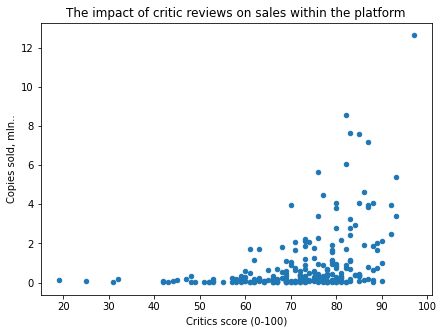

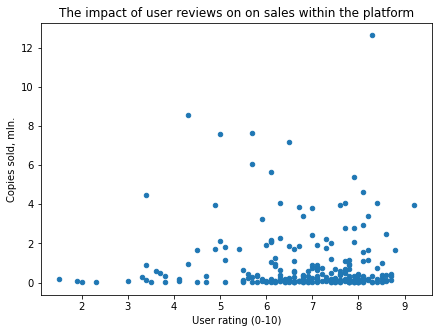

Platform XOne
Correlation coefficient of critical reviews with sales for XOne  equals 0.43
Correlation coefficient of user reviews with sales for XOne  equals -0.07


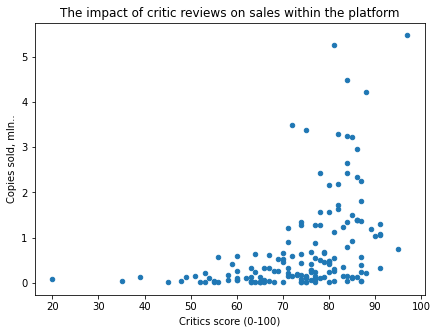

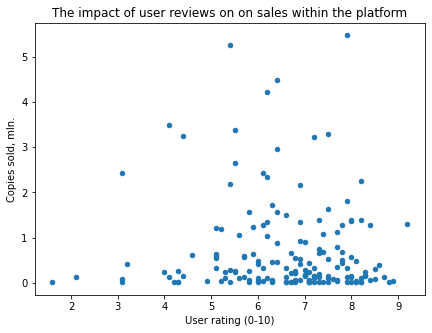

Platform 3DS
Correlation coefficient of critical reviews with sales for 3DS  equals 0.31
Correlation coefficient of user reviews with sales for 3DS  equals 0.22


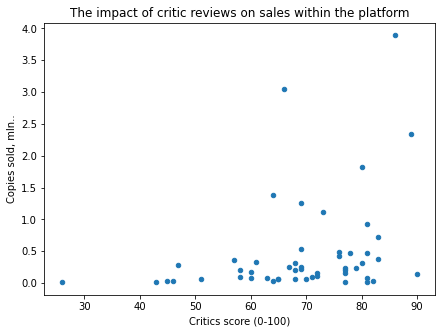

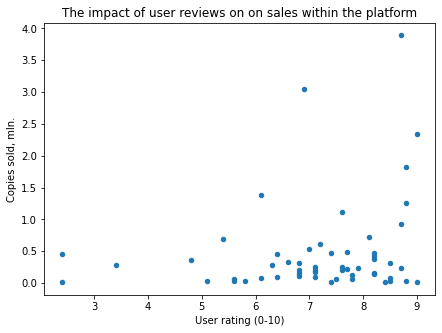

Platform PS3
Correlation coefficient of critical reviews with sales for PS3  equals 0.45
Correlation coefficient of user reviews with sales for PS3  equals -0.17


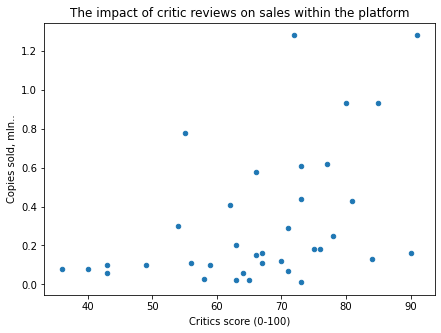

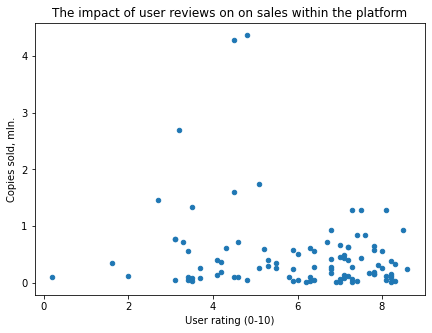

Platform X360
Correlation coefficient of critical reviews with sales for X360  equals 0.53
Correlation coefficient of user reviews with sales for X360  equals -0.14


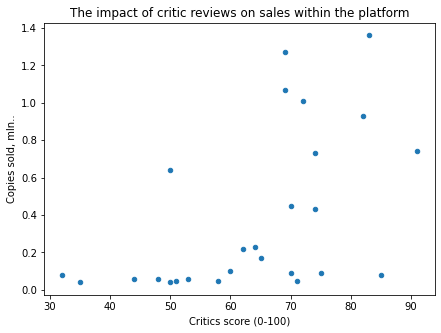

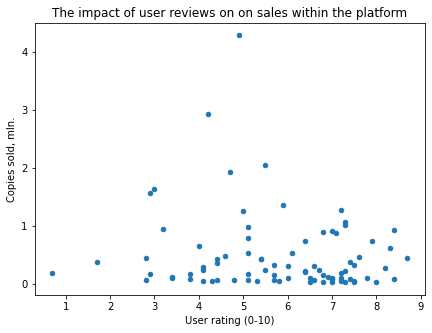

In [209]:
#The impact of reviews from critics and users on sales within the platform
#list with the most profitable platforms

for name in top_5:
    
    print(f'Platform {name}')
    
   # Scatterplot for the influence of reviews from critics on sales within the platform
    (games_topical_period
     .query('platform==@name')
     .plot(x='critic_score',y='grand_total_sales',
      kind='scatter', title='The impact of critic reviews on sales within the platform',
      xlabel='Critics score (0-100)', ylabel='Copies sold, mln..',
      figsize=(7,5))
    )
    
    # Scatterplot for the impact of user reviews on sales within the platform
    (games_topical_period
     .query('platform==@name')
     .plot(x='user_score',y='grand_total_sales',
           kind='scatter', title='The impact of user reviews on on sales within the platform',
           xlabel='User rating (0-10)', ylabel='Copies sold, mln.',
           figsize=(7,5))
    )
    
    
    #Correlation coefficient calculation
    
    correl = (games_topical_period
             .query('platform==@name')['critic_score']
             .corr(games_topical_period.query('platform==@name')['grand_total_sales'])
             )
    
    print(f'Correlation coefficient of critical reviews with sales for {name}  equals {correl:.2f}')
    
    correl = (games_topical_period
              .query('platform==@name')['user_score']
              .corr(games_topical_period.query('platform==@name')['grand_total_sales'])
             )
    
    print(f'Correlation coefficient of user reviews with sales for {name}  equals {correl:.2f}')

    plt.show()

### Conclusion

Building scatterplots and calculating correlation coefficients separately for each popular platform allows us to draw the following conclusions for all platforms:
* Both user reviews and critic reviews are correlated with game sales
* Critics' reviews have a stronger correlation with sales than user reviews
* On PS4 and XOne platforms, user reviews have a very weak correlation with sales, on other platforms, the correlation is just weak

The stronger correlation between critical reviews and game sales can be explained by greater critical acclaim among players. That is, when buying a game, users trust critics' ratings more. The Pearson correlation coefficient shows only a linear relationship, so it cannot be definitively concluded that user reviews do not affect sales. Perhaps there is a more complex, non-linear relationship between user reviews and sales.

It is also impossible to say with 100% certainty that with high reviews from critics the game will become super popular, since the Pearson correlation coefficient we found does not prove a causal relationship between the popularity of the game and reviews from critics.

### Distribution of games by genres. Selection of the most profitable genres.

Let's see which genres have the highest average sales.

In [210]:
# Getting a summary table of the distribution of games by genre and sorting in descending order
# average number of copies sold for the genre
(games_topical_period
 .pivot_table(index='genre',values='grand_total_sales',aggfunc=('count', 'sum','mean'))
 .sort_values(by='mean', ascending=False)
 .reset_index()
)

,genre,count,mean,sum
0,Shooter,128,1.34,170.94
1,Sports,161,0.68,109.48
2,Platform,38,0.48,18.09
3,Fighting,60,0.47,28.22
4,Role-Playing,221,0.46,101.44
5,Racing,69,0.40,27.52
6,Misc,113,0.33,37.55
7,Action,619,0.32,199.36
8,Simulation,44,0.30,13.13
9,Puzzle,14,0.16,2.21


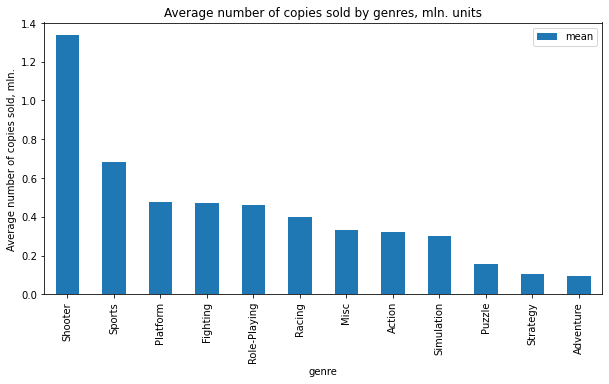

In [211]:
# Building a bar chart of the most profitable genres

(games_topical_period
 .pivot_table(index='genre',values='grand_total_sales',aggfunc=('count', 'mean'))
 .sort_values(by='mean', ascending=False).reset_index()
 .plot(
     kind='bar', y='mean', x='genre', xlabel='genre', ylabel='Average number of copies sold, mln.',
     title = 'Average number of copies sold by genres, mln. units', figsize=(10,5))
)
plt.show()

The most profitable game genres:

In [212]:
#Most profitable game genres
top_5_genre= (games_topical_period
        .pivot_table(index='genre',values='grand_total_sales',aggfunc=('count', 'sum','mean'))        
       ).nlargest(5, 'mean').index.to_list()
# 
top_5_genre

['Shooter', 'Sports', 'Platform', 'Fighting', 'Role-Playing']

## User portrait of each region (NA, EU, JP)

In [213]:
data_info(games_topical_period)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1689 non-null   object 
 1   platform           1689 non-null   object 
 2   year_of_release    1689 non-null   int32  
 3   genre              1689 non-null   object 
 4   na_sales           1689 non-null   float64
 5   eu_sales           1689 non-null   float64
 6   jp_sales           1689 non-null   float64
 7   other_sales        1689 non-null   float64
 8   critic_score       718 non-null    float64
 9   user_score         888 non-null    float64
 10  rating             1689 non-null   object 
 11  grand_total_sales  1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


(                                         name platform  year_of_release  \
 31                  Call of Duty: Black Ops 3      PS4             2015   
 42                         Grand Theft Auto V      PS4             2014   
 47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
 77                                    FIFA 16      PS4             2015   
 87               Star Wars Battlefront (2015)      PS4             2015   
 
            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
 31       Shooter      6.03      5.86      0.36         2.38           NaN   
 42        Action      3.96      6.31      0.38         1.97         97.00   
 47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
 77        Sports      1.12      6.12      0.06         1.28         82.00   
 87       Shooter      2.99      3.49      0.22         1.28           NaN   
 
     user_score   rating  grand_total_sales  
 31         NaN  Unknown  

### The most popular platforms (top 5). Description of the difference in sales.

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


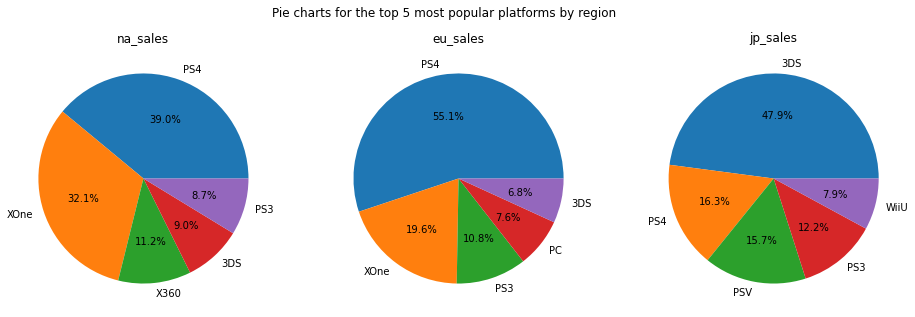

In [214]:
# Displaying a pivot table and building a pie chart for the top 5 most popular platforms by region

fig, axs = plt.subplots(1, 3, figsize=(16,5))
market=['na_sales', 'eu_sales', 'jp_sales']

count=-1
for value in market:
    count+=1

    table = ( games_topical_period
             .pivot_table(index='platform', values=value, aggfunc='sum')
             .sort_values(by=value, ascending=False)
             .reset_index()
             .head()
            )
    display(table)
    axs[count].pie(table[value],labels=table['platform'],autopct='%.1f%%')
    axs[count].set_title(value)
    ax.set_aspect('equal')
    
fig.suptitle('Pie charts for the top 5 most popular platforms by region')    
plt.show()

The largest gaming market is in North America, followed by Europe and Japan. In North America and Europe, the most popular platforms are `PS4` and `XOne`. In North America, the `X360`, `3DS`, `PS3` platforms are next in popularity. In Europe - `PS3`, `PS`, `3DS`.

In Japan, the most popular platforms are `3DS` and `PS4`. Next come `PSV`, `PS3`, `WiiU`

### The most popular genres (top 5). Explanation of the difference.

,genre,na_sales
0,Shooter,0.62
1,Sports,0.29
2,Fighting,0.21
3,Platform,0.18
4,Role-Playing,0.15


,genre,eu_sales
0,Shooter,0.51
1,Sports,0.28
2,Racing,0.20
3,Platform,0.18
4,Simulation,0.17


,genre,jp_sales
0,Role-Playing,0.14
1,Fighting,0.11
2,Platform,0.07
3,Puzzle,0.07
4,Simulation,0.05


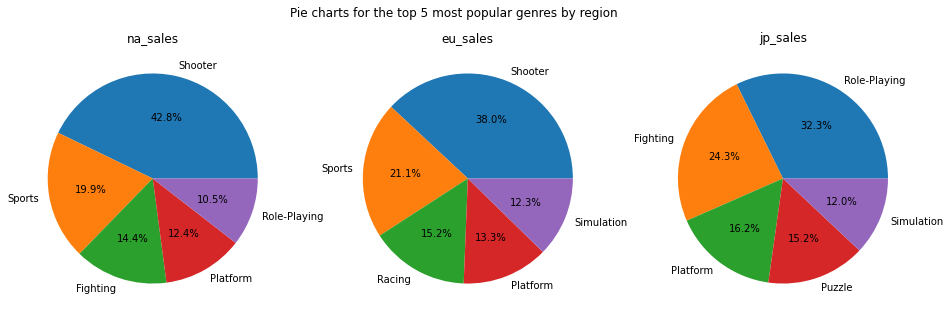

In [215]:
# Display a pivot table and build a pie chart for the top 5 most popular genres by region


fig, axs = plt.subplots(1, 3, figsize=(16,5))
market=['na_sales', 'eu_sales', 'jp_sales']

count=-1
for value in market:
    count+=1

    table = ( games_topical_period
             .pivot_table(index='genre', values=value, aggfunc='mean')
             .sort_values(by=value, ascending=False)
             .reset_index()
             .head()
            )
    display(table)
    axs[count].pie(table[value],labels=table['genre'],autopct='%.1f%%',normalize=True)
    axs[count].set_title(value)
    ax.set_aspect('equal')
    
fig.suptitle('Pie charts for the top 5 most popular genres by region')     
plt.show()

The most popular genres in North America and Europe are `Shooter` and `Sports`. For North America, the following genres are `Fighting`, `Platform`, `Role-Playing`. For Europe - `Racing`, `Platform`, `Simulation`.

In Japan, the most popular genres are `Role-Playing` and `Fighting`. Next come the `Platform`, `Puzzle`, `Simulation` genres. The `Shooter` and `Sports` genres are not in the top 5 popular genres in Japan.

### The impact of the ESRB rating on sales in a particular region.

,rating,na_sales
0,M,96.42
1,Unknown,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


,rating,eu_sales
0,M,93.44
1,Unknown,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


,rating,jp_sales
0,Unknown,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


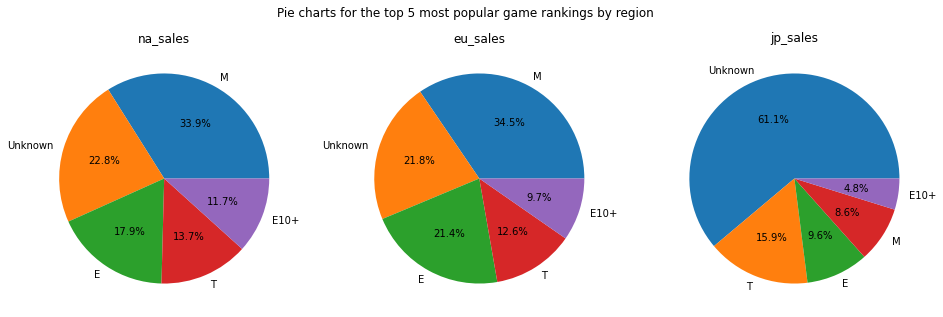

In [216]:
# Output a pivot table and build a pie chart by region
#by the number of sales of games with a certain ESRB rating

fig, axs = plt.subplots(1, 3, figsize=(16,5))
market=['na_sales', 'eu_sales', 'jp_sales']

count=-1
for value in market:
    count+=1

    table = ( games_topical_period
             .pivot_table(index='rating', values=value, aggfunc='sum')
             .sort_values(by=value, ascending=False)
             .reset_index()
             .head()
            )
    display(table)
    axs[count].pie(table[value],labels=table['rating'],autopct='%.1f%%')
    axs[count].set_title(value)
    ax.set_aspect('equal')
    
fig.suptitle('Pie charts for the top 5 most popular game rankings by region')     
plt.show()

For America and Europe, the distribution of sales depending on the ESRB rating is approximately the same. In descending order, the highest sales for ratings are: `M`, `Unknown`, `E`, `T`, and `E10+`.

For Japan, the distribution looks different. In descending order, games rated `Unknown`, `T`, `E`, `M`, and `E10+` have the highest sales. More than half of the games in Japan are not rated by the ESRB, because this rating was created for Western countries. This explains the missing data in the rating column.

## Hypothesis testing

### The average user ratings of the Xbox One and PC platforms are the same

We will formulate the null and alternative hypotheses.

Null hypothesis, H0: The average user ratings of the Xbox One and PC platforms are equal.

Alternative Hypothesis: The average user ratings of the Xbox One and PC platforms are not equal.

In [217]:
# Count sample sizes and missing values
for value in ['XOne', 'PC']:
    value_na=games_topical_period.query('platform==@value')['user_score'].isna().mean()
    value_len=len(games_topical_period.query('platform==@value')['user_score'])
    print(f'The number of values in the sample by {value}: {value_len}')
    print(f'Percentage of missing values in the sample by {value}: {value_na:.0%}')

The number of values in the sample by XOne: 228
Percentage of missing values in the sample by XOne: 28%
The number of values in the sample by PC: 151
Percentage of missing values in the sample by PC: 19%


We will conduct a two-tailed hypothesis test. We will set the threshold value alpha to 0.05.

In [218]:
alpha=0.05

# set the parameter equal_var=False, because we have samples of different sizes
# Get rid of NaN in samples using the droppna() method
results=st.ttest_ind(
    games_topical_period.query('platform=="XOne"')['user_score'].dropna(),
    games_topical_period.query('platform=="PC"')['user_score'].dropna(), equal_var = False)

if results.pvalue < alpha:
    print(f'p-value {results.pvalue}')
    print('Rejection of the null hypothesis')
else:
    print(f'p-value {results.pvalue}')
    print('Failed to reject the null hypothesis')

p-value 0.11601398086668832
Failed to reject the null hypothesis


Thus, we accept the null hypothesis that the average user ratings of the Xbox One and PC platforms are equal.

### The average user ratings of the genres Action and Sports are different.

We will formulate the null and alternative hypotheses.

Null hypothesis, H0: The average user ratings of the Action and Sports platforms are equal.

Alternative Hypothesis: The average user ratings of the Action and Sports platforms are not equal.

In [219]:
# Count sample sizes and missing values
for value in ['Sports', 'Action']:
    value_na=games_topical_period.query('genre==@value')['user_score'].isna().mean()
    value_len=len(games_topical_period.query('genre==@value')['user_score'])
    print(f'The number of values in the sample by {value}: {value_len}')
    print(f'Percentage of missing values in the sample by {value}: {value_na:.0%}')

The number of values in the sample by Sports: 161
Percentage of missing values in the sample by Sports: 21%
The number of values in the sample by Action: 619
Percentage of missing values in the sample by Action: 52%


We will conduct a two-tailed hypothesis test. We will set the threshold value alpha to 0.05.

In [220]:
alpha=0.05

# set the parameter equal_var=False, because we have samples of different sizes
# Get rid of NaN in samples using the droppna() method
results=st.ttest_ind(
    games_topical_period.query('genre=="Sports"')['user_score'].dropna(),
    games_topical_period.query('genre=="Action"')['user_score'].dropna(), equal_var = False)

if results.pvalue < alpha:
    print(f'p-value {results.pvalue}')
    print('Rejection of the null hypothesis')
else:
    print(f'p-value {results.pvalue}')
    print('Failed to reject the null hypothesis')

p-value 1.1825550382644557e-14
Rejection of the null hypothesis


We reject the null hypothesis and accept the alternative hypothesis that the average user ratings of the `Action` and `Sports` genres are different.

## General conclusion<a id="summary"></a>

We were given the task of identifying the patterns that determine the success of the game in order to bet on a potentially popular product and plan an advertising campaign for 2017.

Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from open sources. Data presented up to 2016.


At the beginning of the study, data preprocessing was carried out:

* casting data to the desired types
* handling missing values
* removing duplicates

Based on the results of data analysis, the current period from 2014 to 2016 was chosen, for which further research was carried out. For the current period, separately by region (North America, Europe and Japan), the top 5 were selected:
* platforms
* genres
* game ratings.



После проведения исследовательского анализа данных были выявлены следующие определяющие успешность игры закономерности, которые помогут запланировать рекламную компанию на 2017 год:

* The region where the game is sold: the largest game market in North America, followed by Europe and Japan.

* The platform on which the game was released. Top 5 most profitable platforms: `PS4`, `XOne`, `3DS`, `PS3`, `X360`. In North America and Europe, the most popular platforms are `PS4` and `XOne`. In North America, `X360`, `3DS`, `PS3` platforms are next in popularity. In Europe - `PS3`, `PS`, `3DS`. In Japan, the most popular platforms are `3DS` and `PS4`. Next come `PSV`, `PS3`, `WiiU`

* Game genre. The most popular genres in North America and Europe are `Shooter` and `Sports`. For North America, next in popularity are the genres `Fighting`, `Platform`, `Role-Playing`. For Europe - `Racing`, `Platform`, `Simulation`. In Japan, the most popular genres are `Role-Playing` and `Fighting`. Next come the `Platform`, `Puzzle`, `Simulation` genres. The `Shooter` and `Sports` genres are not in the top 5 popular genres in Japan.


* `ESRB` rating. For America and Europe, the distribution of sales depending on the ESRB rating is approximately the same. In descending order, the highest sales for ratings are: `M`, `Unknown`, `E`, `T` and `E10+`. For Japan, the distribution looks different. In descending order, the highest sales are for games rated: `Unknown`, `T`, `E`, `M` and `E10+`. More than half of the games in Japan are not rated by the ESRB, because this rating was created for Western countries.



* The influence of critic and user reviews on game sales was investigated. Both user reviews and critic reviews are correlated with game sales. Critical reviews have a stronger correlation with sales than user reviews. This can be explained by the greater credibility of critics among players, i.e. when buying a game, users trust critics' ratings more. The Pearson correlation coefficient shows only a linear relationship, so it cannot be definitively concluded that user reviews do not affect sales. Perhaps there is a more complex, non-linear relationship between user reviews and sales. It is also impossible to say with 100% certainty that with high reviews from critics the game will become super popular, since the Pearson correlation coefficient we found does not prove a causal relationship between the popularity of the game and reviews from critics.